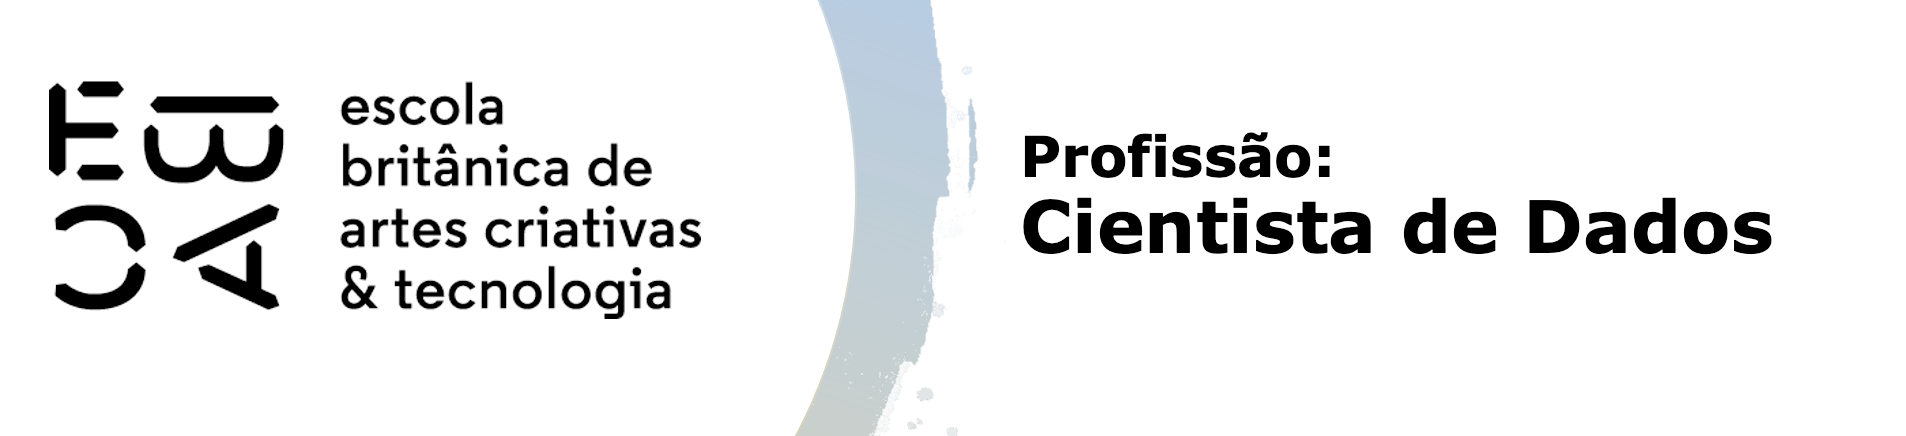

# Tarefa

Com base na tarefa realizada no módulo anterior, vamos fazer um diagnóstico do modelo.

Carregue a base ```previsao_de_renda2.csv```. Separe em uma base de treino e uma base de teste.

Vamos resgatar a melhor versão do modelo e previsão de renda que você fez para esta base. 

- Substitua missings pela média
- Rode novamente o modelo na base de treino (ou desenvolva-o caso não tenha o registro guardado). 

Este modelo deve prever a variável ```renda``` com base nas demais variáveis exceto ```data_ref``` e ```index```. Já vimos que a variável renda é melhor modelada com a transformação ```log()```, não se esqueça disso.

In [1]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA

import scipy.stats as stats
import statsmodels.api as sm
import statsmodels.formula.api as smf

df = pd.read_csv('../Mod_32/previsao_de_renda_II.csv')
df.head()

data_ref  index sexo posse_de_veiculo posse_de_imovel  qtd_filhos  \
0  2015-01-01   5762    M                S               N           0   
1  2015-01-01   1279    M                S               N           0   
2  2015-01-01  14111    M                S               N           0   
3  2015-01-01   8189    M                N               S           2   
4  2015-01-01   1830    F                N               S           2   

    tipo_renda             educacao estado_civil tipo_residencia  idade  \
0   Empresário    Superior completo       Casado            Casa     47   
1  Assalariado  Superior incompleto       Casado            Casa     30   
2  Assalariado    Superior completo       Casado            Casa     28   
3  Assalariado                Médio       Casado            Casa     44   
4  Assalariado    Superior completo       Casado            Casa     33   

   tempo_emprego  qt_pessoas_residencia     renda  
0      16.717808                    2.0  11138.14  
1       9.600000                    2.0   2424.81  
2       8.208219                    2.0  13749.66  
3       1.301370                    4.0   2361.84  
4       1.254795                    4.0    790.78

In [2]:
# Substituindo missings pela média
df['tempo_emprego'] = df['tempo_emprego'].fillna(df['tempo_emprego'].mean())
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 750000 entries, 0 to 749999
Data columns (total 14 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   data_ref               750000 non-null  object 
 1   index                  750000 non-null  int64  
 2   sexo                   750000 non-null  object 
 3   posse_de_veiculo       750000 non-null  object 
 4   posse_de_imovel        750000 non-null  object 
 5   qtd_filhos             750000 non-null  int64  
 6   tipo_renda             750000 non-null  object 
 7   educacao               750000 non-null  object 
 8   estado_civil           750000 non-null  object 
 9   tipo_residencia        750000 non-null  object 
 10  idade                  750000 non-null  int64  
 11  tempo_emprego          750000 non-null  float64
 12  qt_pessoas_residencia  750000 non-null  float64
 13  renda                  750000 non-null  float64
dtypes: float64(3), int64(3), object(8)
m

In [3]:
df['data_ref'] = pd.to_datetime(df['data_ref'])
df['data_ref']

0        2015-01-01
1        2015-01-01
2        2015-01-01
3        2015-01-01
4        2015-01-01
            ...    
749995   2016-03-01
749996   2016-03-01
749997   2016-03-01
749998   2016-03-01
749999   2016-03-01
Name: data_ref, Length: 750000, dtype: datetime64[ns]

In [4]:
df['mes'] = df['data_ref'].dt.month
df['mes']

0         1
1         1
2         1
3         1
4         1
         ..
749995    3
749996    3
749997    3
749998    3
749999    3
Name: mes, Length: 750000, dtype: int32

In [5]:
# Dividindo base de dados em bases de treino e teste
X = df.drop(['renda'], axis=1)
y = np.log(df['renda'])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=412)

df_train = pd.concat([X_train, y_train], axis=1)
df_test = pd.concat([X_test, y_test], axis=1)

df_train.rename({'renda': 'log_renda'}, axis=1, inplace=True)
df_test.rename({'renda': 'log_renda'}, axis=1, inplace=True)

df_train.head(5)

data_ref  index sexo posse_de_veiculo posse_de_imovel  qtd_filhos  \
425276 2015-09-01  13410    F                N               N           0   
344487 2015-07-01   4032    F                N               S           1   
325594 2015-07-01   1330    F                N               S           1   
561248 2015-12-01   4657    M                S               S           1   
46307  2015-01-01  11316    F                N               S           0   

         tipo_renda           educacao estado_civil tipo_residencia  idade  \
425276  Assalariado  Superior completo     Separado            Casa     51   
344487  Assalariado              Médio     Solteiro            Casa     40   
325594   Empresário  Superior completo       Casado            Casa     45   
561248  Assalariado  Superior completo       Casado   Governamental     42   
46307   Pensionista              Médio       Casado            Casa     57   

        tempo_emprego  qt_pessoas_residencia  mes  log_renda  
425276       4.931507                    1.0    9   8.943769  
344487       2.378082                    2.0    7   9.423802  
325594       6.090411                    3.0    7   9.756565  
561248       0.438356                    3.0   12   8.454209  
46307        7.746165                    2.0    1   6.850402

In [6]:
reg = smf.ols('log_renda ~ sexo + posse_de_veiculo + posse_de_imovel + qtd_filhos + tipo_residencia + idade + tempo_emprego + qt_pessoas_residencia', 
              data=df_train).fit()

reg.rsquared_adj

0.3834087506193432

## Verifique as suposições do modelo

Faça uma análise para avaliar as suposições básicas:

- Os resíduos desse modelo possuem distribuição Normal (ou algo próximo)?
- Verifique a independência dos resíduos
    - Faça um gráfico dos resíduos versus os valores preditos
    - Avalie se há padrões dos resíduos versus cada uma das variáveis do modelo
    - Avalie se o valor médio dos resíduos aparenta ter relação com o mês de referência
- Avalie se a variância da variável resposta parece ser conforme os valores previstos.

Você considera que as suposições estão atendidas? Há algum impacto em eventuais desvios?

In [7]:
df_train['resid'] = reg.resid
df_train['fitted_values'] = reg.fittedvalues
df_train.head(5)

data_ref  index sexo posse_de_veiculo posse_de_imovel  qtd_filhos  \
425276 2015-09-01  13410    F                N               N           0   
344487 2015-07-01   4032    F                N               S           1   
325594 2015-07-01   1330    F                N               S           1   
561248 2015-12-01   4657    M                S               S           1   
46307  2015-01-01  11316    F                N               S           0   

         tipo_renda           educacao estado_civil tipo_residencia  idade  \
425276  Assalariado  Superior completo     Separado            Casa     51   
344487  Assalariado              Médio     Solteiro            Casa     40   
325594   Empresário  Superior completo       Casado            Casa     45   
561248  Assalariado  Superior completo       Casado   Governamental     42   
46307   Pensionista              Médio       Casado            Casa     57   

        tempo_emprego  qt_pessoas_residencia  mes  log_renda     resid  \
425276       4.931507                    1.0    9   8.943769  0.478424   
344487       2.378082                    2.0    7   9.423802  1.060855   
325594       6.090411                    3.0    7   9.756565  0.932039   
561248       0.438356                    3.0   12   8.454209  0.213614   
46307        7.746165                    2.0    1   6.850402 -2.138931   

        fitted_values  
425276       8.465345  
344487       8.362947  
325594       8.824526  
561248       8.240594  
46307        8.989333

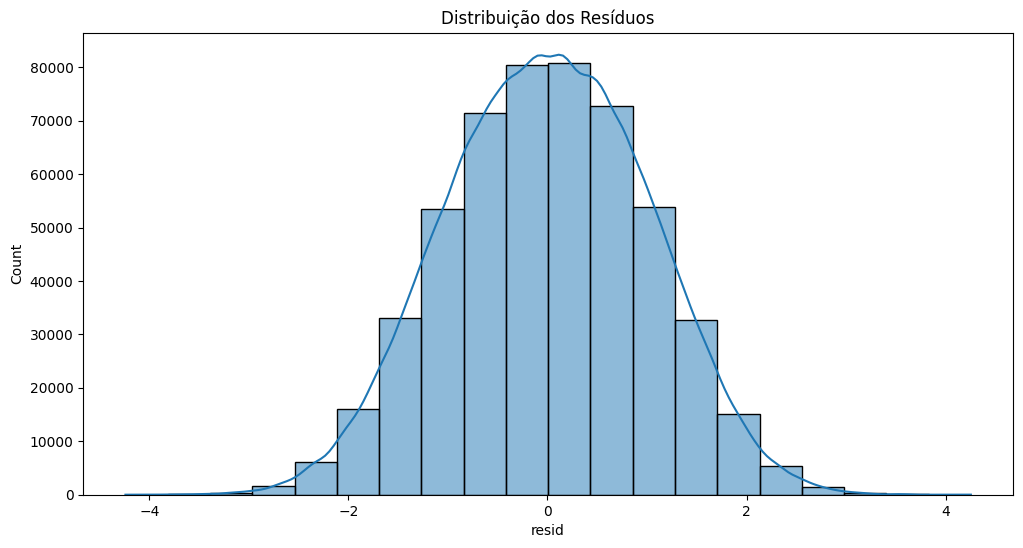

In [8]:
# 1. Verificação da normalidade dos resíudos
plt.figure(figsize=(12,6))
sns.histplot(df_train['resid'], kde=True, bins=20)
plt.title('Distribuição dos Resíduos')
plt.show()

Conforme observado pelo gráfico acima, os resíduos do modelo possuem uma distribuição normal.

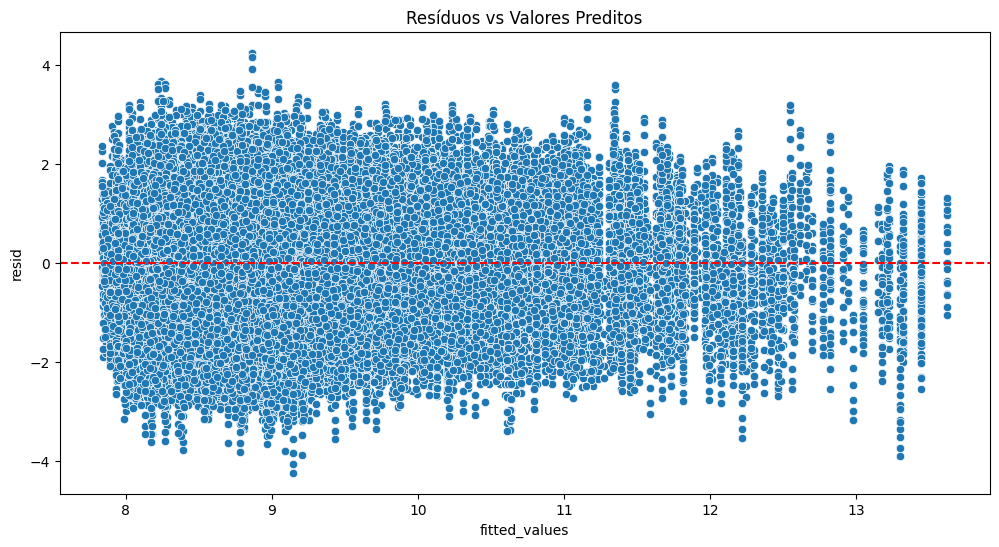

In [9]:
# 2. Independência dos resíduos
plt.figure(figsize=(12,6))
sns.scatterplot(x=df_train['fitted_values'], y=df_train['resid'])
plt.axhline(y=0, color='r', linestyle='--')
plt.title('Resíduos vs Valores Preditos')
plt.show()

In [10]:
df_train['sexo'] = df_train['sexo'].map({'F': 1, 'M': 0})
df_train['posse_de_veiculo'] = df_train['posse_de_veiculo'].map({'N': 0, 'S': 1})
df_train['posse_de_imovel'] = df_train['posse_de_imovel'].map({'N': 0, 'S': 1})
df_train['tipo_residencia'] = df_train['tipo_residencia'].map({'Casa': 1, 'Governamental': 2, 'Aluguel': 3, 'Estúdio': 4, 'Com os pais': 5, 'Comunitário': 6})

In [11]:
df_train[['sexo', 'posse_de_veiculo', 'posse_de_imovel', 'qtd_filhos', 'tipo_residencia', 'idade', 'tempo_emprego', 'qt_pessoas_residencia']]

sexo  posse_de_veiculo  posse_de_imovel  qtd_filhos  tipo_residencia  \
425276     1                 0                0           0                1   
344487     1                 0                1           1                1   
325594     1                 0                1           1                1   
561248     0                 1                1           1                2   
46307      1                 0                1           0                1   
...      ...               ...              ...         ...              ...   
614673     1                 1                0           1                1   
249506     1                 1                0           2                1   
598885     1                 1                1           0                1   
12172      1                 1                1           1                1   
614386     1                 0                0           1                3   

        idade  tempo_emprego  qt_pessoas_residencia  
425276     51       4.931507                    1.0  
344487     40       2.378082                    2.0  
325594     45       6.090411                    3.0  
561248     42       0.438356                    3.0  
46307      57       7.746165                    2.0  
...       ...            ...                    ...  
614673     39       6.898630                    3.0  
249506     43      20.189041                    4.0  
598885     61       9.605479                    2.0  
12172      35       6.383562                    2.0  
614386     39       9.605479                    2.0  

[525000 rows x 8 columns]

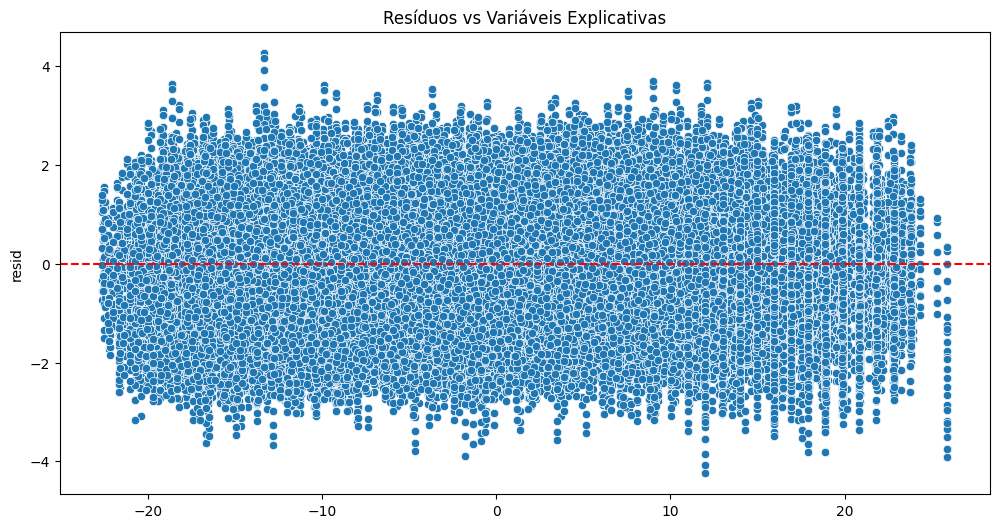

In [12]:
# 3. Padrões dos resíduos vs variáveis independentes

# Combinação linear das variáveis explicativas do modelo em um array unidimensional
pca = (PCA(n_components=1)
       .fit_transform(df_train[['sexo', 'posse_de_veiculo', 'posse_de_imovel', 'qtd_filhos', 'tipo_residencia', 'idade', 'tempo_emprego', 'qt_pessoas_residencia']])
       .flatten())

# Visualizando gráfico
plt.figure(figsize=(12,6))
sns.scatterplot(x=pca, y=df_train['resid'])
plt.axhline(y=0, color='r', linestyle='--')
plt.title('Resíduos vs Variáveis Explicativas')
plt.show()

In [13]:
# Função para plotar gráfico
def plotar_grafico_variavel_explicativa_vs_residuo(var):
    plt.figure(figsize=(12,6))
    sns.scatterplot(x=df_train[var], y=df_train['resid'])
    plt.axhline(y=0, color='r', linestyle='--')
    plt.title('Resíduos vs Variável {}'.format(var))
    plt.show()

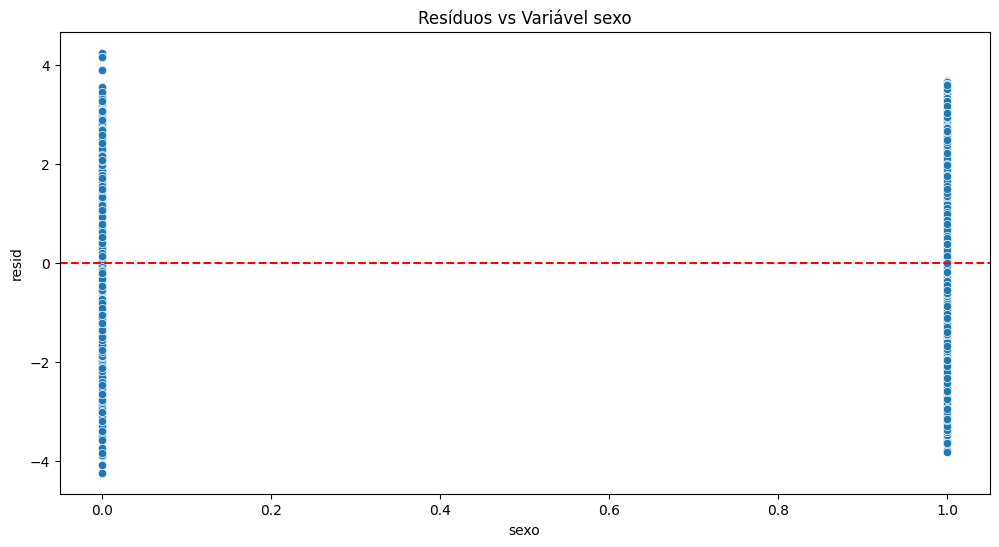

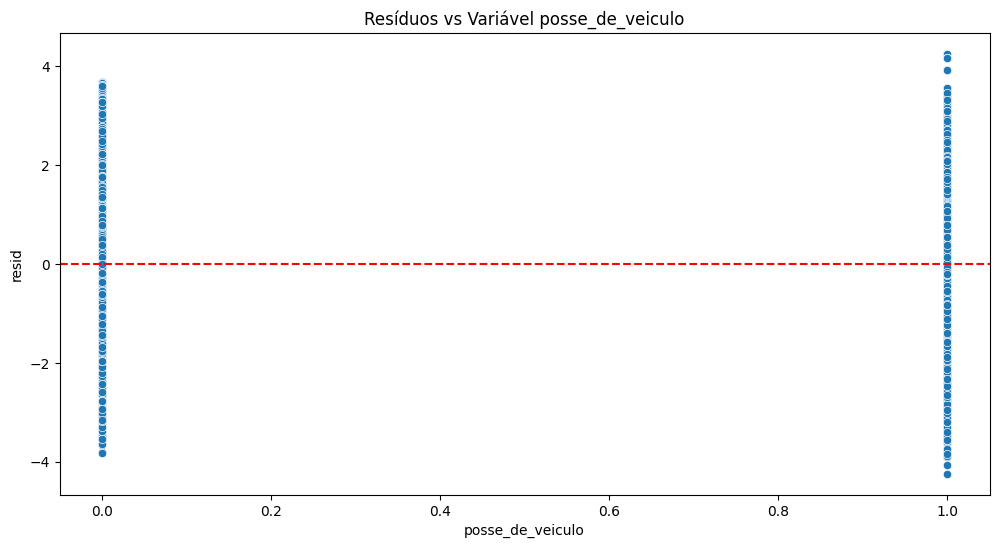

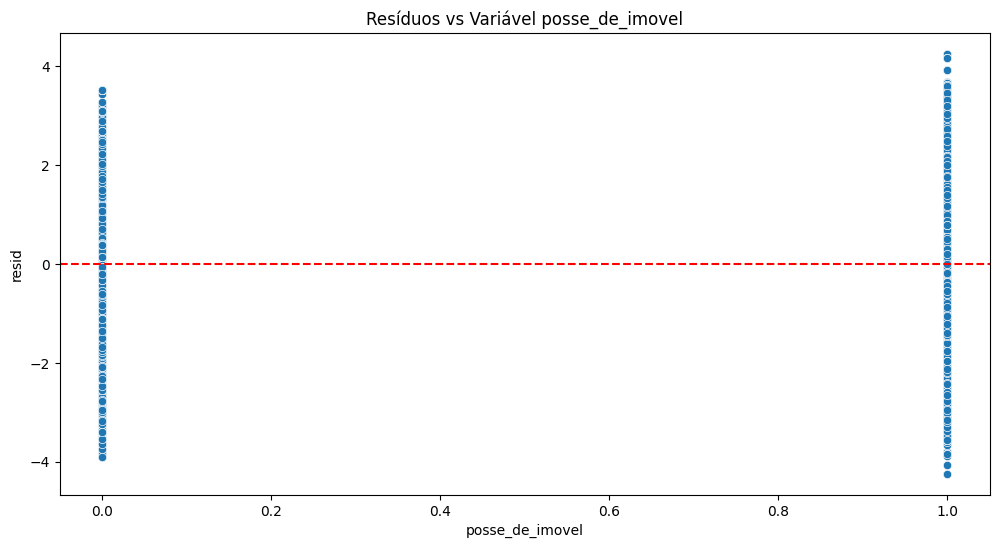

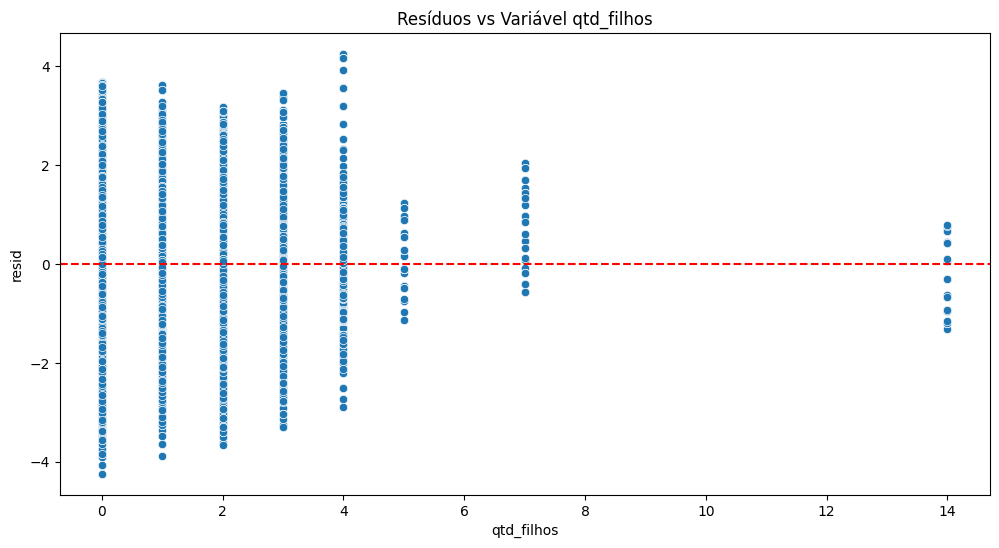

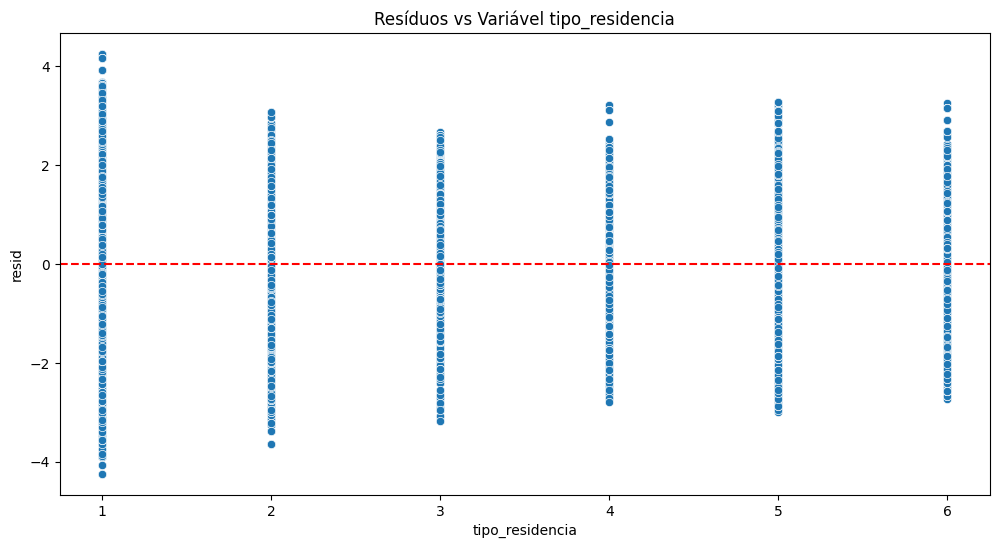

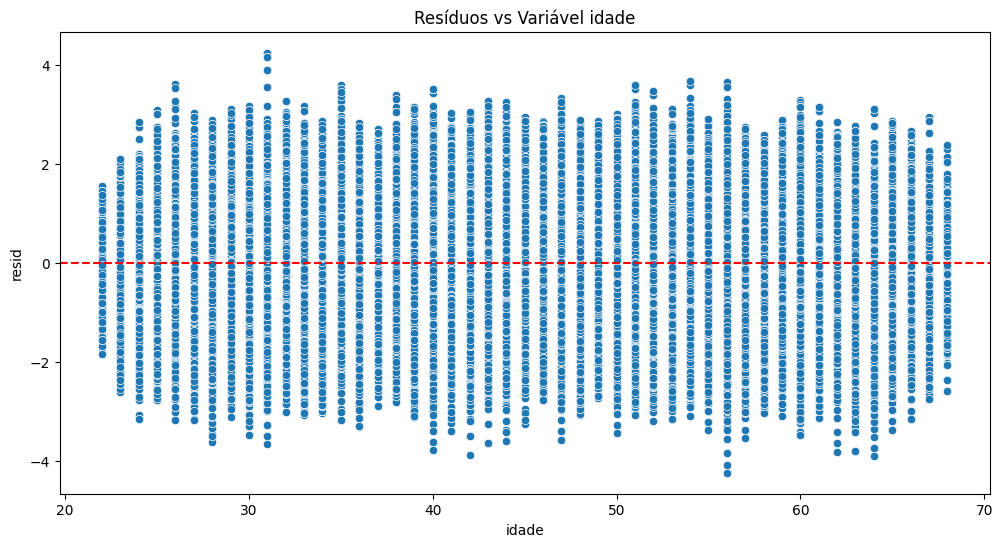

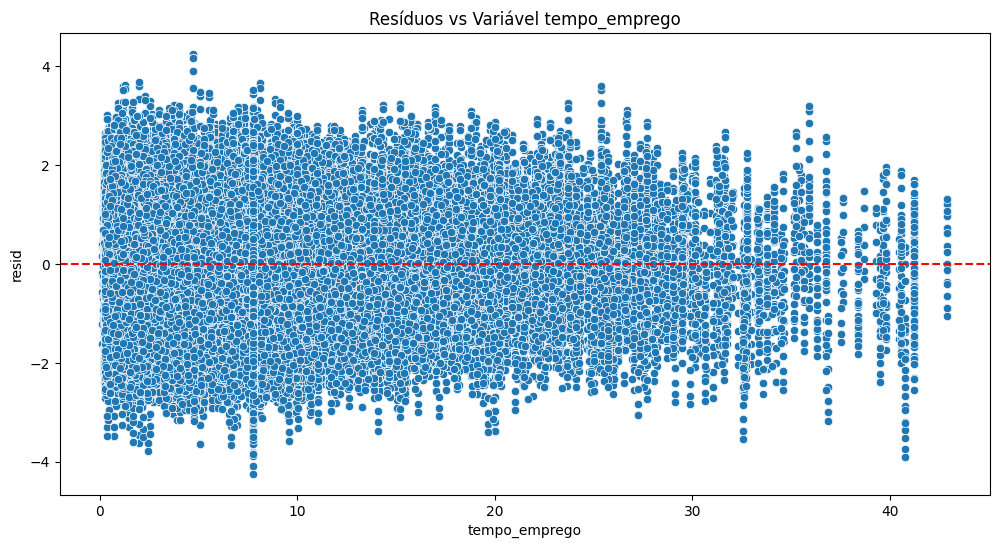

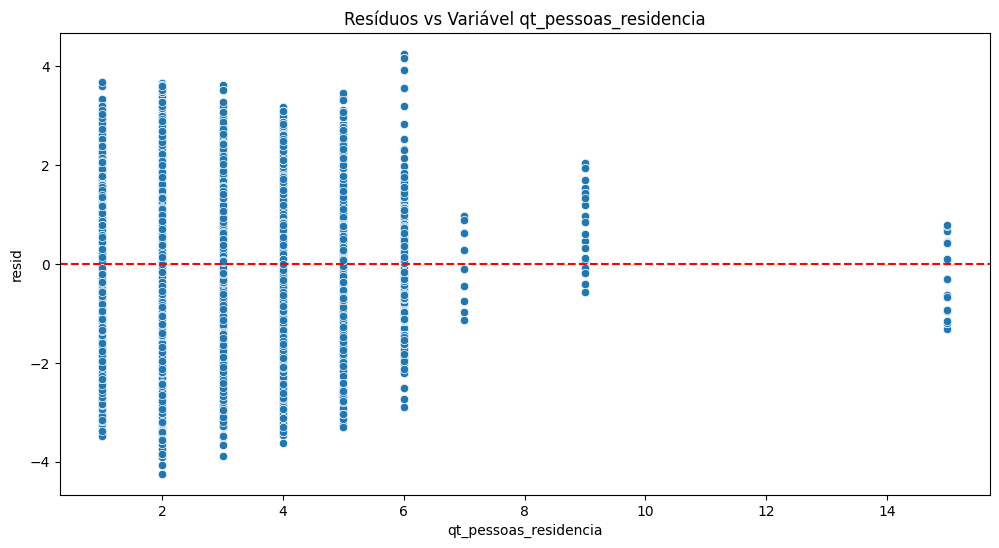

In [14]:
for var in ['sexo', 'posse_de_veiculo', 'posse_de_imovel', 'qtd_filhos', 'tipo_residencia', 'idade', 'tempo_emprego', 'qt_pessoas_residencia']:
    plotar_grafico_variavel_explicativa_vs_residuo(var)

Observando pelos gráficos acima, as variáveis explicativas não parecem demonstrar nenhum padrão em sua distribuição afetado pelos resíduos, portanto podemos considerar os resíduos **independentes**.

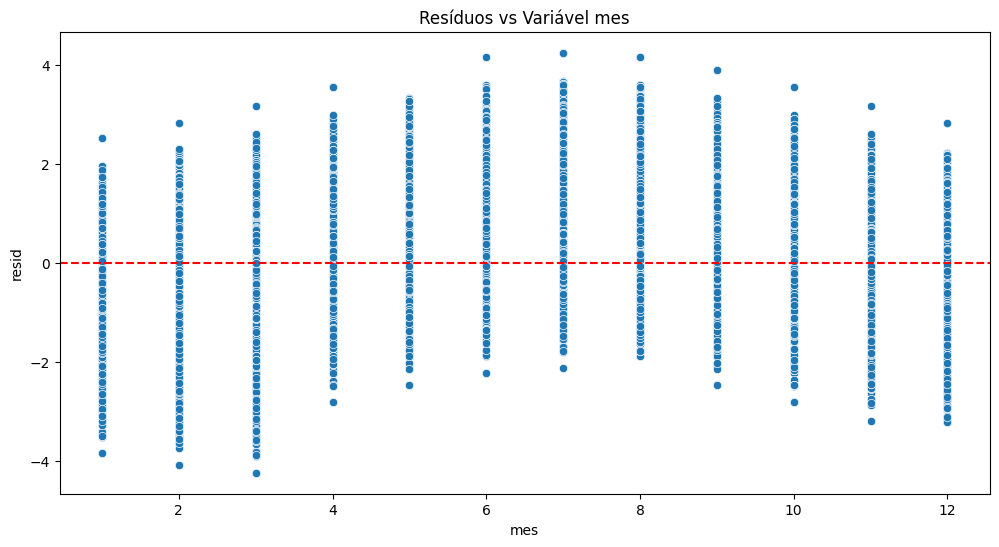

In [15]:
# Avaliando se valor médio dos resíduos é afetado pelo mês de referencia
plotar_grafico_variavel_explicativa_vs_residuo('mes')

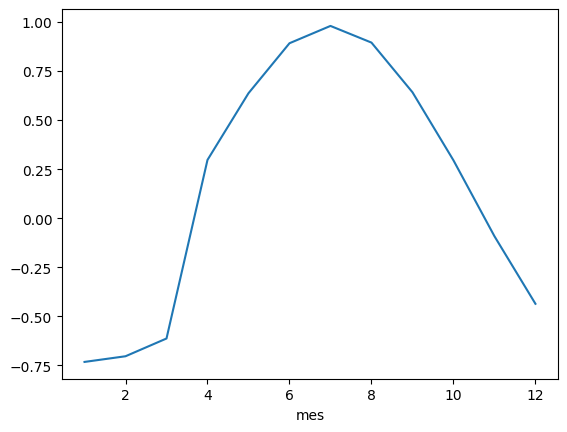

In [16]:
gp = df_train.groupby(by='mes')['resid'].mean()
gp.plot.line()
plt.show()

Observando pelos gráficos acima, de fato os resíduos do modelo são afetados pela variável explicativa **mes**, contudo, como excluímos essa variável do modelo, esse permanece inafetado por essa propriedade.

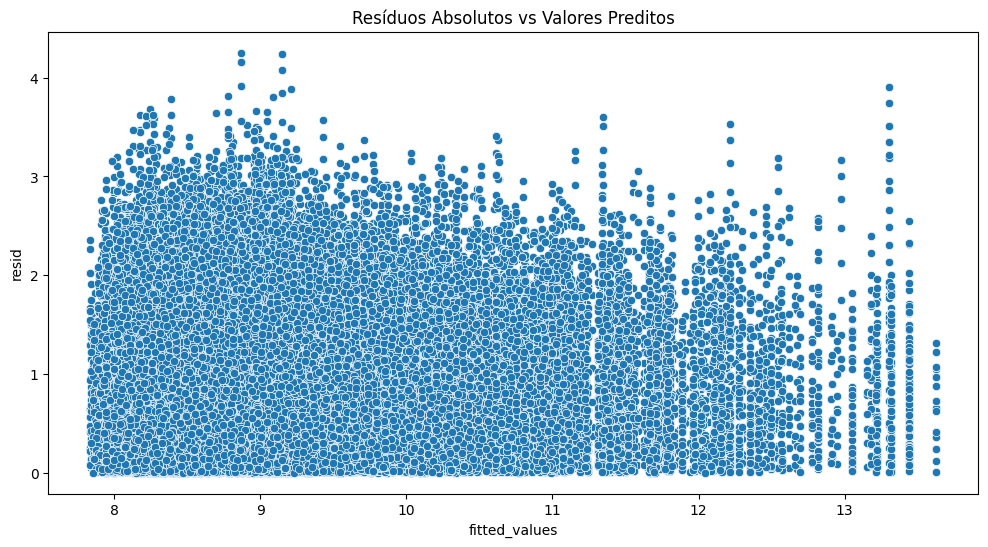

In [17]:
# 4. Homocedasticidade (variância da variável resposta com valores preditos)
plt.figure(figsize=(12,6))
sns.scatterplot(x=df_train['fitted_values'], y=np.abs(df_train['resid']))
plt.title('Resíduos Absolutos vs Valores Preditos')
plt.show()

Observando o gráfico acima, não parece existir padrão nenhum que indique uma relação entre a variância da variável resposta e o resíduo do modelo, portanto a suposição de **homecedasticidade** do modelo é verdadeira.

## Outliers

Avalie os *studentized residuals*, verifique se há pontos que parecem ser discrepantes.

Avalie se há pontos influentes.

In [18]:
influence = reg.get_influence()

studentized_residuals = influence.resid_studentized_external

outliers = np.where(np.abs(studentized_residuals) > 2)[0]

distance_cook = influence.cooks_distance[0]

influential_points = np.where(distance_cook > 1)[0]

print('Studentized Residuals (Outliers):', outliers)
print('Pontos influentes (Distância de Cook > 1):', influential_points)

plt.figure(figsize=(10,5))
plt.scatter(range(len(studentized_residuals)), studentized_residuals, label='Resíduos Studentizados')
plt.axhline(y=2, color='r', linestyle='--', label='Limite Superior')
plt.axhline(y=-2, color='r', linestyle='--', label='Limite Inferior')
plt.xlabel('Índice da Observação')
plt.ylabel('Resíduo Studentizado')
plt.legend()
plt.title('Resíduos Studentizados e Outliers')
plt.show()

KeyboardInterrupt: 

## Multicolinearidade

Avalie se há questões relacionadas a multicolinearidade através de pelo menos:

- Matriz de correlação de Spearman
- VIF

## Ajustes

Faça os ajustes que julgar necessários no modelo e compare as métricas de desempenho do modelo original e ajustado na base de testes.